### Midterm project - Kaggle exercise project

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

Goals

* Get familar with Kaggle competition since our final project may be a real Kaggle competition.
* Practice on large data set
* Data quality checking, missing data imputation
* Feature selection. What's your rationals to choose those features.
* Create at least 5 new features and explain your reason for every new features.
* Use feature importance to help you choose 10 features
* Choose 3 ML algorithms we covered in the class to build your prediction models
* For each model you build, you will need to evaluate and show your effort to improve it.
* Your jupyter submission should be in an article quality. Do NOT print huge data set in the notebook. Use head(). Use plotting to visualize your analysis and results. Use markdown to write your comments.
* Your score is based on completeness on every step.
* Submit in HTML and ipynb format on canvas

## Project Notes

* Clean up dataset
* Use dimensionality reduction techniques on dataset (everyone can implement one technique on the dataset and discuss what we find)
* Discuss w/ group on feature selection, feature creation
* Each one of us will choose and build a prediction model
* Attempt to improve model at least once or twice

### Dimensionality Reduction Techniques
* Variance Check
* Correlation Check
* Decision Tree (Random Forest) Feature Importance
* PCA
* Kernel PCA

### ML Algorithms
* Linear Regression
* Logistic Regression
* KNN (k-nearest neighbors)
* Naive Bayes Classifier
* Decision Trees
* SVM (support vector machines)

In [361]:
## Import Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import seaborn as sns
import graphviz
import plotly.express as px
from sklearn import metrics, neighbors, preprocessing, model_selection, datasets, svm, cluster, datasets, mixture, tree
from sklearn.cluster import KMeans, MeanShift, DBSCAN, AgglomerativeClustering
from sklearn.datasets import make_moons, make_blobs
from sklearn.decomposition import PCA, KernelPCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix, silhouette_score, calinski_harabasz_score
from sklearn.metrics.cluster import completeness_score, homogeneity_score
from sklearn.metrics.pairwise import euclidean_distances,cosine_distances,manhattan_distances,cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
pd.options.display.max_rows = 4000


In [362]:
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

In [363]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [364]:
train_df.shape

(1460, 81)

In [365]:
print(train_df.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

Replace string values with numerical ones

In [366]:
train_df['LotFrontage'].fillna('NA',inplace=True)
train_df['LotFrontage'].fillna('Alley',inplace=True)
train_df['MasVnrType'].fillna('NA',inplace=True)
train_df['MasVnrArea'].fillna('NA',inplace=True)
train_df['BsmtQual'].fillna('NA',inplace=True)
train_df['BsmtCond'].fillna('NA',inplace=True)
train_df['BsmtExposure'].fillna('NA',inplace=True)
train_df['BsmtFinType1'].fillna('NA',inplace=True)
train_df['BsmtFinType2'].fillna('NA',inplace=True)
train_df['Electrical'].fillna('NA',inplace=True)
train_df['GarageType'].fillna('NA',inplace=True)
train_df['GarageYrBlt'].fillna('NA',inplace=True)
train_df['GarageFinish'].fillna('NA',inplace=True)
train_df['GarageQual'].fillna('NA',inplace=True)
train_df['GarageCond'].fillna('NA',inplace=True)
train_df['FireplaceQu'].fillna('NA',inplace=True)
train_df['PoolQC'].fillna('NA',inplace=True)
train_df['Fence'].fillna('NA',inplace=True)
train_df['MiscFeature'].fillna('NA',inplace=True)
train_df['Alley'].fillna('NA',inplace=True)

In [367]:
rating = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
train_df.BsmtQual = [rating[item] for item in train_df.BsmtQual]
train_df.BsmtCond = [rating[item] for item in train_df.BsmtCond]
train_df.KitchenQual = [rating[item] for item in train_df.KitchenQual]
train_df.HeatingQC = [rating[item] for item in train_df.HeatingQC]
train_df.FireplaceQu = [rating[item] for item in train_df.FireplaceQu]
train_df.PoolQC = [rating[item] for item in train_df.PoolQC]

In [368]:
pavement = {'Y': 1.0, 'P': 0.5, 'N': 0}
train_df.PavedDrive = [pavement[item] for item in train_df.PavedDrive]

In [369]:
function = {'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1}
train_df.Functional = [function[item] for item in train_df.Functional]


In [370]:
util = {'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2, 'ELO': 1}
train_df.Utilities = [util[item] for item in train_df.Utilities]


In [371]:
bsmtex = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0}
train_df.BsmtExposure = [bsmtex[item] for item in train_df.BsmtExposure]

In [372]:
air = {'Y': 1, 'N': 0}
train_df.CentralAir = [air[item] for item in train_df.CentralAir]

In [373]:
fen = {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'NA': 0}
train_df.Fence = [fen[item] for item in train_df.Fence]

New Feature 1: Average of OverallQual and OverallCond

In [374]:
train_df['OverallRating'] = ((train_df['OverallQual']+train_df['OverallCond'])/2)
train_df['OverallRating'].head()
train_df = train_df.drop(['OverallQual','OverallCond'],axis=1)

New Feature 2: Total Square Feet of 1st and 2nd Floors

In [375]:
train_df['TotalFloorSqFt'] = train_df['1stFlrSF']+train_df['2ndFlrSF']
train_df['TotalFloorSqFt'].head()
train_df = train_df.drop(['1stFlrSF','2ndFlrSF'],axis=1)

New Feature 3: Total Outdoor Porch and Deck Square Feet

In [376]:
train_df['TotalPorchDeckSqFt'] = (train_df['WoodDeckSF']+train_df['OpenPorchSF']
                                +train_df['EnclosedPorch']+train_df['3SsnPorch']
                                +train_df['ScreenPorch'])

train_df = train_df.drop(['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'],axis=1)


New Feature 4: Garage Overall Quality

In [377]:
garage = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
train_df.GarageQual = [garage[item] for item in train_df.GarageQual]
train_df.GarageCond = [garage[item] for item in train_df.GarageCond]

train_df['GarageOverall'] = ((train_df['GarageQual']+train_df['GarageCond'])/2)

train_df = train_df.drop(['GarageQual','GarageCond'],axis=1)

New Feature 5: Exterior Overall Quality

In [378]:
exterior = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
train_df.ExterQual = [exterior[item] for item in train_df.ExterQual]
train_df.ExterCond = [exterior[item] for item in train_df.ExterCond]

train_df['ExterOverall'] = ((train_df['ExterQual']+train_df['ExterCond'])/2)

train_df = train_df.drop(['ExterQual','ExterCond'],axis=1)

Drop some columns not planning on using

In [380]:
for col in train_df.columns:
    print(col)

Id
MSSubClass
MSZoning
LotFrontage
LotArea
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
PavedDrive
PoolArea
PoolQC
Fence
MiscFeature
MiscVal
MoSold
YrSold
SaleType
SaleCondition
SalePrice
OverallRating
TotalFloorSqFt
TotalPorchDeckSqFt
GarageOverall
ExterOverall


Choose Features

In [389]:
train_target = train_df['SalePrice']

In [386]:
train_feats = train_df[['MSSubClass','LotArea','Utilities','OverallRating',
                       'YearBuilt','ExterOverall','BsmtQual','BsmtCond',
                       'BsmtExposure','TotalBsmtSF','HeatingQC','CentralAir',
                        'TotalFloorSqFt','GrLivArea','KitchenQual','TotRmsAbvGrd',
                        'Functional','Fireplaces','FireplaceQu','GarageCars',
                        'GarageOverall','PavedDrive','TotalPorchDeckSqFt']]


In [404]:
train_feats.head(5)

,MSSubClass,LotArea,Utilities,OverallRating,YearBuilt,ExterOverall,BsmtQual,BsmtCond,BsmtExposure,TotalBsmtSF,...,GrLivArea,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageCars,GarageOverall,PavedDrive,TotalPorchDeckSqFt
0,60,8450,4,6.0,2003,3.5,4,3,1,856,...,1710,4,8,8,0,0,2,3.0,1.0,61
1,20,9600,4,7.0,1976,3.0,4,3,4,1262,...,1262,3,6,8,1,3,2,3.0,1.0,298
2,60,11250,4,6.0,2001,3.5,4,3,2,920,...,1786,4,6,8,1,3,2,3.0,1.0,42
3,70,9550,4,6.0,1915,3.0,3,4,1,756,...,1717,4,7,8,1,4,3,3.0,1.0,307
4,60,14260,4,6.5,2000,3.5,4,3,3,1145,...,2198,4,9,8,1,3,3,3.0,1.0,276


Check for Variance

In [406]:
train_feats.var()

MSSubClass            1.789338e+03
LotArea               9.962565e+07
Utilities             2.739726e-03
OverallRating         7.170086e-01
YearBuilt             9.122154e+02
ExterOverall          1.141850e-01
BsmtQual              7.682143e-01
BsmtCond              3.048790e-01
BsmtExposure          1.139324e+00
TotalBsmtSF           1.924624e+05
HeatingQC             9.206418e-01
CentralAir            6.087628e-02
TotalFloorSqFt        2.716114e+05
GrLivArea             2.761296e+05
KitchenQual           4.405771e-01
TotRmsAbvGrd          2.641903e+00
Functional            4.458200e-01
Fireplaces            4.155947e-01
FireplaceQu           3.279275e+00
GarageCars            5.584797e-01
GarageOverall         5.096407e-01
PavedDrive            6.165088e-02
TotalPorchDeckSqFt    2.454113e+04
dtype: float64

Drop Columns with Low Variance

Standardize Features with StandardScaler

In [394]:
scaler = StandardScaler()
scaler.fit(train_feats)
x_scale = scaler.transform(train_feats)
data_scale = pd.DataFrame(x_scale, columns=train_feats.columns)
data_scale.head(5)

,MSSubClass,LotArea,Utilities,OverallRating,YearBuilt,ExterOverall,BsmtQual,BsmtCond,BsmtExposure,TotalBsmtSF,...,GrLivArea,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageCars,GarageOverall,PavedDrive,TotalPorchDeckSqFt
0,0.073375,-0.207142,0.02618,0.192175,1.050994,0.770504,0.583168,0.117884,-0.590555,-0.459303,...,0.370333,0.735994,0.912210,0.237044,-0.951226,-1.008334,0.311725,0.266814,0.289745,-0.768375
1,-0.872563,-0.091886,0.02618,1.373547,0.156734,-0.709675,0.583168,0.117884,2.220999,0.466465,...,-0.482512,-0.771091,-0.318683,0.237044,0.600495,0.648890,0.311725,0.266814,0.289745,0.745011
2,0.073375,0.073480,0.02618,0.192175,0.984752,0.770504,0.583168,0.117884,0.346630,-0.313369,...,0.515013,0.735994,-0.318683,0.237044,0.600495,0.648890,0.311725,0.266814,0.289745,-0.889702
3,0.309859,-0.096897,0.02618,0.192175,-1.863632,-0.709675,-0.558153,1.929579,-0.590555,-0.687324,...,0.383659,0.735994,0.296763,0.237044,0.600495,1.201298,1.650307,0.266814,0.289745,0.802481
4,0.073375,0.375148,0.02618,0.782861,0.951632,0.770504,0.583168,0.117884,1.283814,0.199680,...,1.299326,0.735994,1.527656,0.237044,0.600495,0.648890,1.650307,0.266814,0.289745,0.604528


Use PCA for Dimensionality Reduction

In [395]:
pca = PCA()
x_pca = pca.fit_transform(data_scale)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.871099,-0.870355,-1.861942,0.783568,-0.843726,0.377367,0.311315,-0.352185,-0.228040,-0.599768,...,0.354953,-0.032861,-0.581999,0.193763,0.119039,-0.310596,-0.127165,0.011276,0.232054,-0.006658
1,1.100099,-0.939173,1.428336,-0.973900,0.441638,0.071457,-0.318921,0.288716,0.482565,0.611184,...,-1.292153,1.506145,-0.284253,-0.497086,-1.247751,-0.143938,-0.311464,0.241664,0.005111,-0.000847
2,1.606277,-0.665773,-0.350407,0.486762,0.395224,-0.237342,-0.492101,0.548224,0.184305,-0.822858,...,0.154212,0.200953,-0.371734,0.211355,0.120322,-0.305539,0.716127,-0.218701,-0.094521,0.010037
3,0.896857,0.876513,0.648462,0.292948,1.228503,-0.425887,0.623511,-1.192301,-0.637695,0.990254,...,0.516781,0.484691,-0.501170,-0.838642,1.222532,2.117866,0.259716,-0.278918,-0.436290,-0.032141
4,3.532546,0.648323,-0.516069,0.136352,-0.431686,-0.310817,0.139329,0.091212,0.657371,-0.080684,...,-0.521086,0.510772,-0.760770,0.196355,-0.202127,0.436003,-0.098124,-0.139695,0.057236,-0.006761


In [396]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([2.90968771e-01, 1.08926797e-01, 6.38946320e-02, 6.13376674e-02,
       4.88386695e-02, 4.69820306e-02, 4.32387964e-02, 4.30043588e-02,
       4.15418461e-02, 3.59012549e-02, 3.45322051e-02, 3.06419132e-02,
       2.70960467e-02, 2.54949703e-02, 2.12770445e-02, 1.60311221e-02,
       1.52067808e-02, 1.36578623e-02, 1.09140322e-02, 8.02706348e-03,
       7.22844948e-03, 5.08482751e-03, 1.72859043e-04])

In [397]:
np.cumsum(pca.explained_variance_ratio_)

array([0.29096877, 0.39989557, 0.4637902 , 0.52512787, 0.57396654,
       0.62094857, 0.66418736, 0.70719172, 0.74873357, 0.78463482,
       0.81916703, 0.84980894, 0.87690499, 0.90239996, 0.923677  ,
       0.93970813, 0.95491491, 0.96857277, 0.9794868 , 0.98751386,
       0.99474231, 0.99982714, 1.        ])

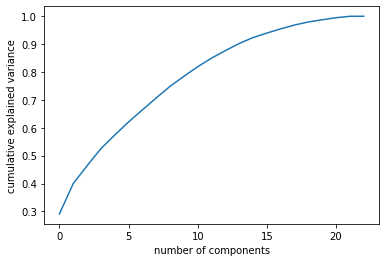

In [403]:
plt.plot(np.arange(23), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## Implement again with Test Dataframe

In [3]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
test_df.shape

(1459, 80)

In [5]:
print(test_df.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [62]:
for col in train1_df.columns:
    print(col)

Id
MSSubClass
MSZoning
LotFrontage
LotArea
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SaleType
SaleCondition
SalePrice
